# **Medallas Olímpicas de Verano** #

# **Exploración de Datos** #

In [1]:
# Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
df = pd.read_csv('olympics_dataset.csv')
df

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [3]:
# Mostrar las primeras filas
print(df.head())

   player_id                   Name Sex            Team  NOC  Year  Season  \
0          0              A Dijiang   M           China  CHN  1992  Summer   
1          1               A Lamusi   M           China  CHN  2012  Summer   
2          2            Gunnar Aaby   M         Denmark  DEN  1920  Summer   
3          3            Edgar Aabye   M  Denmark/Sweden  DEN  1900  Summer   
4         26  Cornelia (-strannood)   F     Netherlands  NED  1932  Summer   

          City       Sport                         Event     Medal  
0    Barcelona  Basketball   Basketball Men's Basketball  No medal  
1       London        Judo  Judo Men's Extra-Lightweight  No medal  
2    Antwerpen    Football       Football Men's Football  No medal  
3        Paris  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold  
4  Los Angeles   Athletics  Athletics Women's 100 metres  No medal  


In [4]:
# Resumen del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB
None


In [5]:
# Estadísticas descriptivas
print(df.describe())

          player_id           Year
count  2.525650e+05  252565.000000
mean   2.305499e+05    1981.743908
std    4.289330e+05      32.596548
min    0.000000e+00    1896.000000
25%    5.713700e+04    1960.000000
50%    1.356110e+05    1988.000000
75%    2.118590e+05    2008.000000
max    9.460001e+06    2024.000000


C:\Users\edgar\AppData\Local\Temp\ipykernel_13320\3564655012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='viridis')


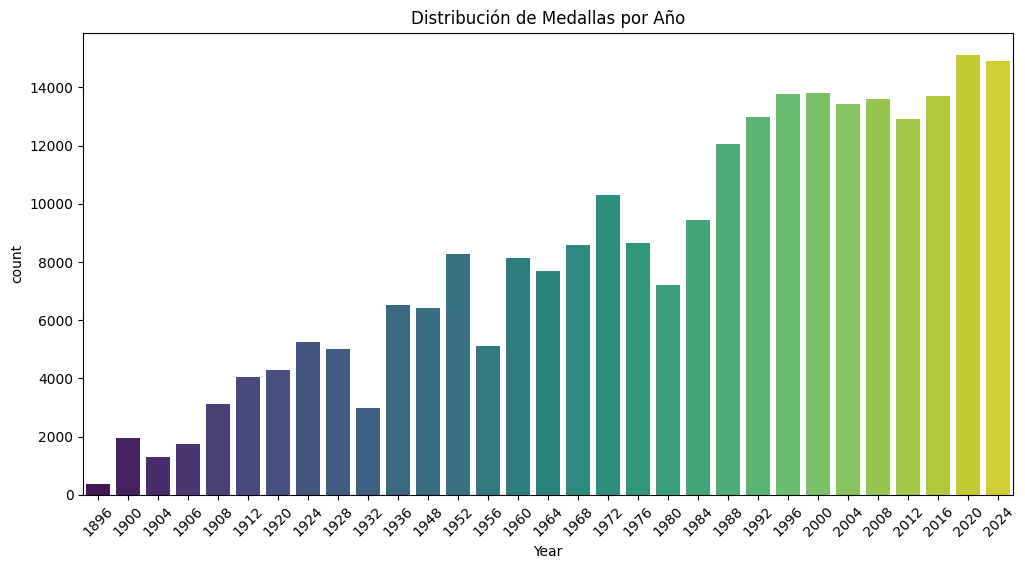

In [6]:
# Visualización de la distribución de medallas por año
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Distribución de Medallas por Año')
plt.xticks(rotation=45)
plt.show()

# **Limpieza de Datos** #

In [7]:
# Verificar valores nulos
print(df.isnull().sum())

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64


In [8]:
# Llenar o eliminar valores nulos
df.fillna({'Medal': 'No Medal'}, inplace=True)

In [9]:
# Convertir tipos de datos si es necesario
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [10]:
# Confirmar que no hay valores nulos
print(df.isnull().sum())

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64


# **Análisis Exploratorio de Datos (EDA)** #

In [11]:
# Análisis de medallas por país
medals_by_country = df.groupby('City')['Medal'].count().sort_values(ascending=False)

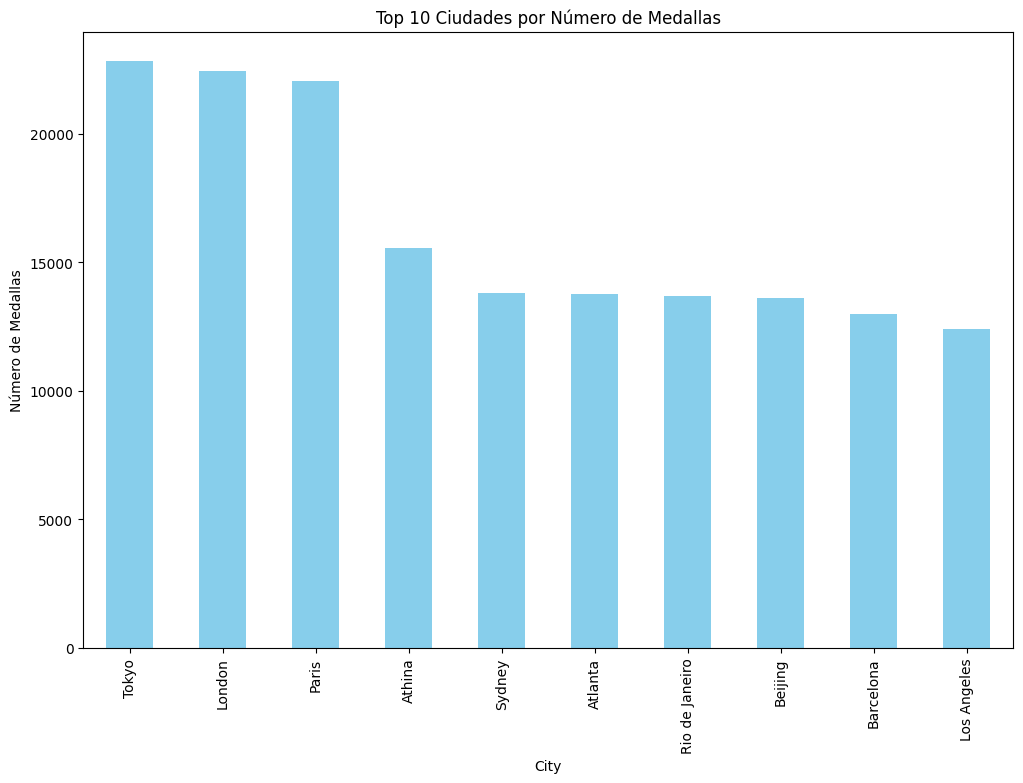

In [12]:
# Visualización
plt.figure(figsize=(12, 8))
medals_by_country.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Ciudades por Número de Medallas')
plt.ylabel('Número de Medallas')
plt.show()

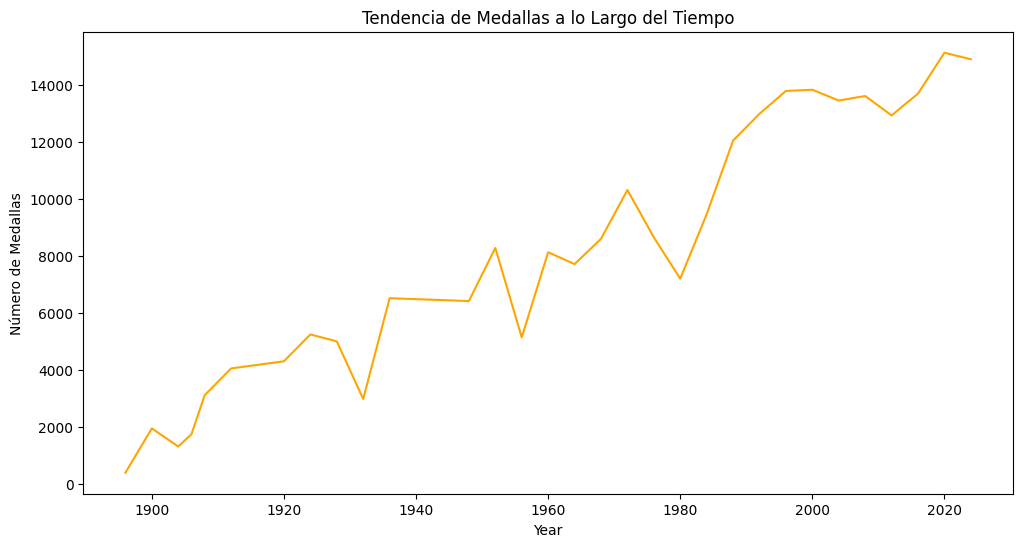

In [13]:
# Análisis de tendencias temporales
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Medal', data=df.groupby('Year').count(), color='orange')
plt.title('Tendencia de Medallas a lo Largo del Tiempo')
plt.ylabel('Número de Medallas')
plt.show()

# **Procesamiento de Datos con Spark** #

In [14]:
from pyspark.sql import SparkSession

# Crear la sesión de Spark
spark = SparkSession.builder.appName('OlympicMedals').getOrCreate()


In [15]:
# Cargar el dataset en Spark
df_spark = spark.read.csv('olympics_dataset.csv', header=True, inferSchema=True)

In [16]:
# Mostrar el esquema
df_spark.printSchema()

root
 |-- player_id: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [17]:
# Consultas en Spark SQL
df_spark.createOrReplaceTempView("medals")
result = spark.sql("SELECT City, COUNT(*) as Total_Medals FROM medals GROUP BY City ORDER BY Total_Medals DESC")
result.show()

+--------------+------------+
|          City|Total_Medals|
+--------------+------------+
|         Tokyo|       22823|
|        London|       22426|
|         Paris|       22061|
|        Athina|       15556|
|        Sydney|       13821|
|       Atlanta|       13780|
|Rio de Janeiro|       13688|
|       Beijing|       13602|
|     Barcelona|       12977|
|   Los Angeles|       12423|
|         Seoul|       12037|
|        Munich|       10304|
|      Montreal|        8641|
|   Mexico City|        8588|
|      Helsinki|        8270|
|          Roma|        8119|
|        Moskva|        7191|
|        Berlin|        6506|
|     Amsterdam|        4992|
|     Melbourne|        4829|
+--------------+------------+
only showing top 20 rows

